# Phonon Dispersion

In [3]:
import numpy as np
from ase.build import bulk
from ase.units import GPa
from ase.visualize import view
from mattersim.forcefield.potential import MatterSimCalculator
from mattersim.applications.phonon import PhononWorkflow

%config InlineBackend.figure_format = 'retina'

> If you see the error that the ``phonopy`` package is missing, you can install it with
> 
> ```bash
> conda install phonopy -c conda-forge
> ```

## Set up the atomic structure with attached MatterSim Calculator

In [4]:
# create structure
si = bulk("Si")

# to visualize the structure, uncomment the following line
# view(si.repeat([2,2,2]), viewer="x3d")

In [5]:
# attach calculator to the structure
si.calc = MatterSimCalculator()

2024-12-02 09:23:36,413 - INFO - Loading the pre-trained mattersim-v1.0.0-1M.pth model


## Set up the phonon workflow

Supercell matrix for 2nd force constants : 
[[4 0 0]
 [0 4 0]
 [0 0 4]]




Inferring forces for displaced atoms and computing fcs ...


100%|██████████| 1/1 [00:00<00:00,  2.63it/s]
/home/hanyang/miniforge3/envs/mattersim-public-test-install-9/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/hanyang/miniforge3/envs/mattersim-public-test-install-9/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/hanyang/miniforge3/envs/mattersim-public-test-install-9/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/home/hanyang/miniforge3/envs/mattersim-public-test-install-9/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarnin

Max drift of force constants: -0.000004 (zz) -0.000004 (xx)
Max drift after symmetrization by translation: -0.000000 (xx) -0.000000 (xx)
Qpoints mesh for Brillouin Zone integration : [24 24 24]
Dispersion relations using phonopy for Si2 ...

Has imaginary phonon: False
Phonon frequencies: <phonopy.api_phonopy.Phonopy object at 0x79df360c45e0>


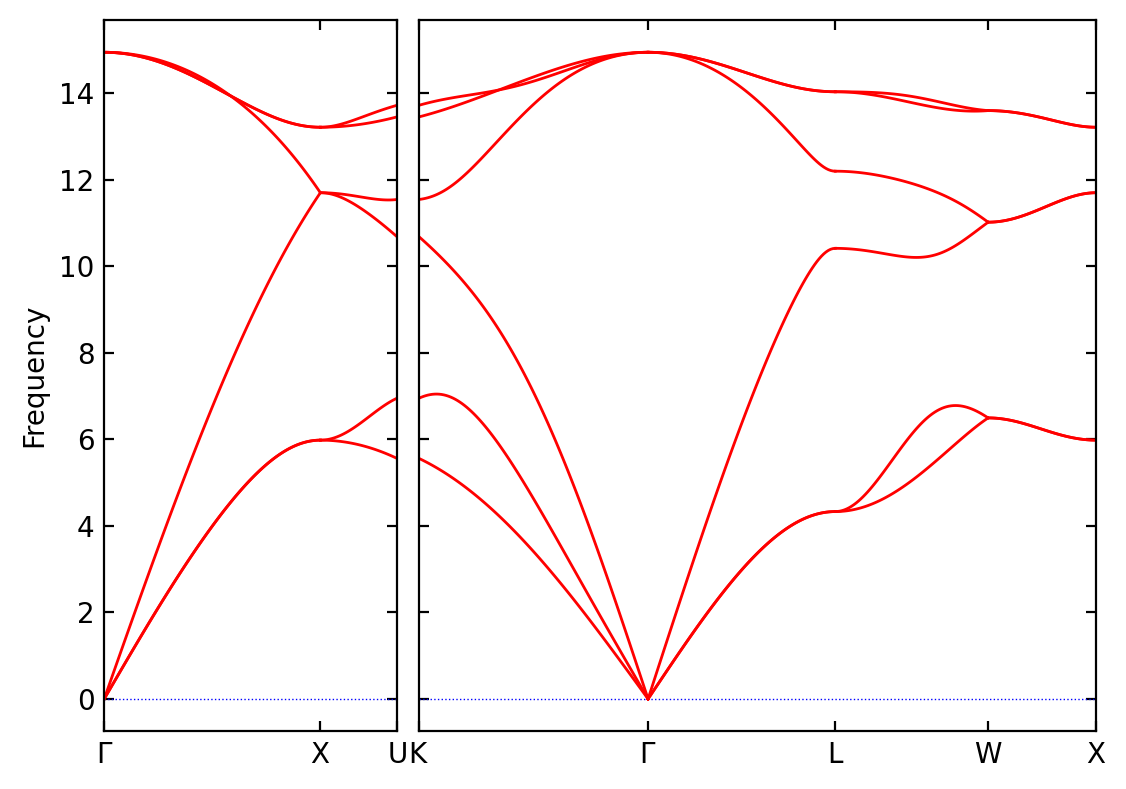

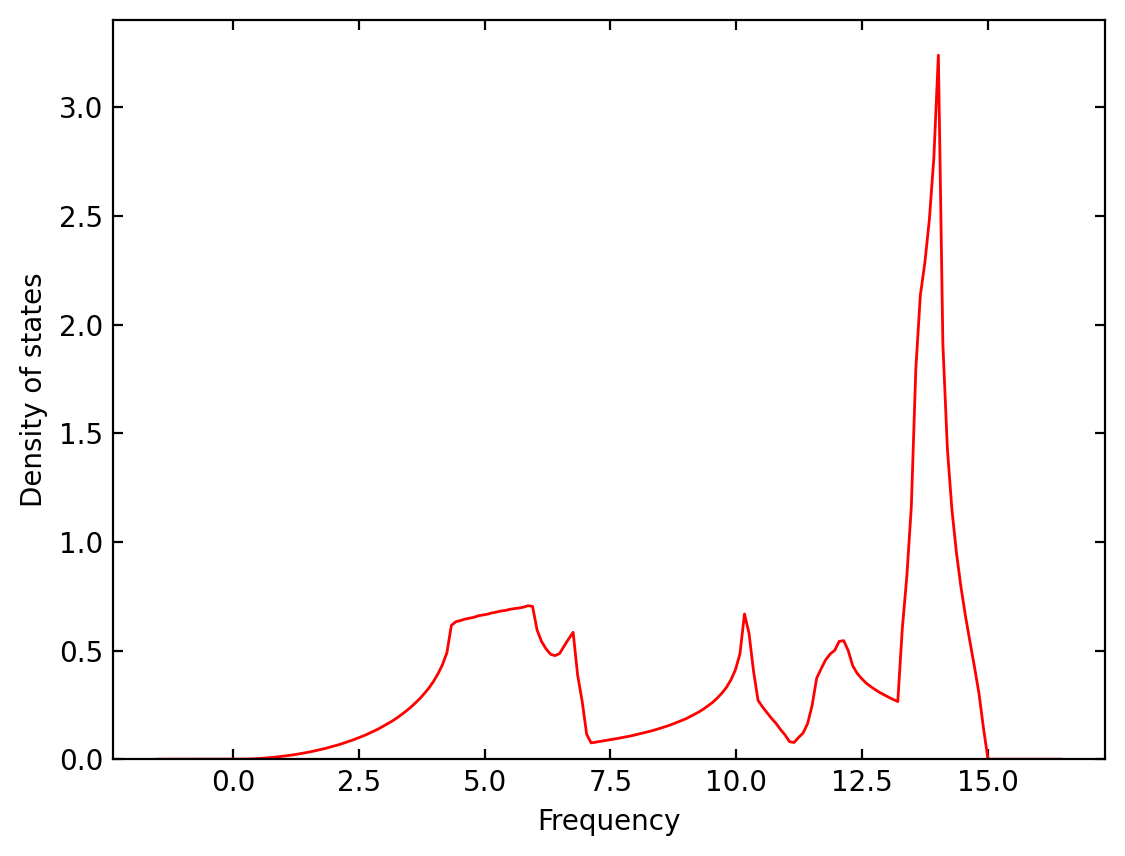

In [6]:
ph = PhononWorkflow(
    atoms=si,
    find_prim = False,
    work_dir = "/tmp/phonon_si_example",
    amplitude = 0.01,
    supercell_matrix = np.diag([4,4,4]),
)
has_imag, phonons = ph.run()
print(f"Has imaginary phonon: {has_imag}")
print(f"Phonon frequencies: {phonons}")


In [7]:
# In the work_dir, you can find the output files of the phonon calculation,
# including the phonon dispersion, phonon density of states, etc.
!ls /tmp/phonon_si_example

Si2_phonon_band.png  band.yaml		  total_dos.dat
Si2_phonon_dos.png   phonopy_params.yaml
